# Fonctions d'ordre supérieur

In [1]:
# modules nécessaire pour le notebook
import matplotlib.pyplot as plt
import math
import numpy as np

## Définition
Une fonction est dite **d'ordre supérieur** si elle prend en paramètre(s) une ou plusieurs fonction(s) et qu'elle retourne une nouvelle fonction.

## Un premier exemple issu des mathématiques

Notons $E$ l'ensemble des fonctions continues définies sur $\mathbb{R}$. Soit $x_{0}\in\mathbb{R}$ et condidérons la fonction:
$$
\begin{array}{rrcl}
\Phi: & E & \rightarrow & E\\
      & f & \mapsto & \Phi(f)
\end{array}
$$
où $$\Phi(f)(x)=\int_{x_{0}}^{x}f(t)dt$$

$\Phi(f)$ est l'unique primitive de $f$ qui s'annule en $x_{0}$.

### Première implémentation (à l'aide de la méthode des rectangles)

In [2]:
def primitive(f):
    h = 0.001 # pas dans la méthode des rectangles
    x0 = 0 # borne de gauche dans l'intégrale = val. en laquelle s'annule la primitive
    def F(x):
        N = int((x-x0)/h) # cardinal de la subdivision de l'intervalle  [x; x0]
        return h * sum([f(x0 + i * h) for i in range(N)])
    return F

On peut tester la fonction **primitive**, en l'applicant à la fonction $x\mapsto x$.

<IPython.core.display.Javascript object>


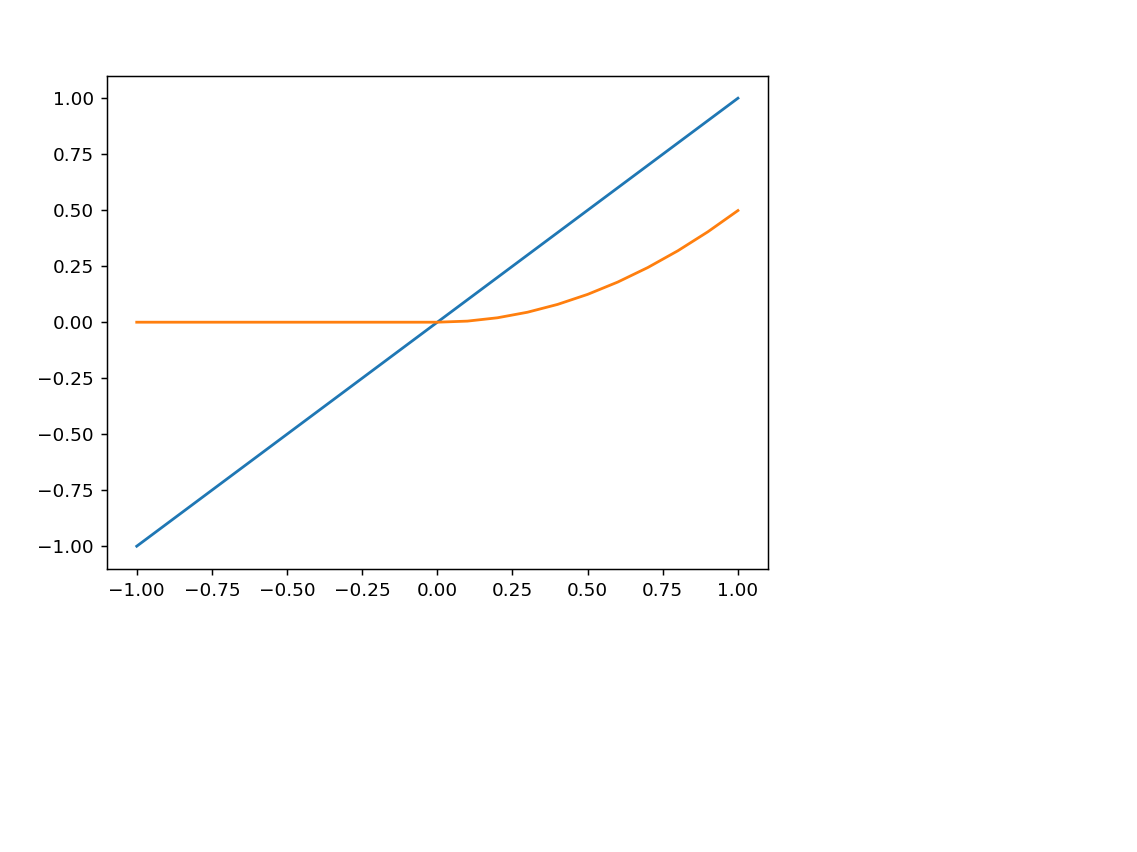

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x

F = primitive(f)

abscisses = np.arange(-1,1.1,0.1)
a = [f(x) for x in abscisses]
b = [F(x) for x in abscisses]

plt.plot(abscisses, a)
plt.plot(abscisses, b)
plt.show()

On constate que la fonction **primitive** fonctionne pour les réels positifs; on reconnaît la fonction $x\mapsto \frac{1}{2}x^{2}$. Il y a, en revanche, un problème pour les réels négatifs. Au moins deux raisons à cela:
+ le pas $h$ doit être négatif lorsque $x$ est plus petit que $x_{0}$
+ arrange(N) pose un problème avec N négatif
Corrigeons cela:

In [8]:
def primitive(f):
    h = 0.001 # pas dans la méthode des rectangles
    x0 = 0 # borne de gauche dans l'intégrale = val. en laquelle s'annule la primitive
    def F(x):
        H = h if x > x0 else -h # attention aux bornes
        N = int((x-x0)/H)
        return H * sum([f(x0 + i * H) for i in range(N)])
    return F

On peut tester à nouveau et retrouver la fonction $\arctan$:

<IPython.core.display.Javascript object>


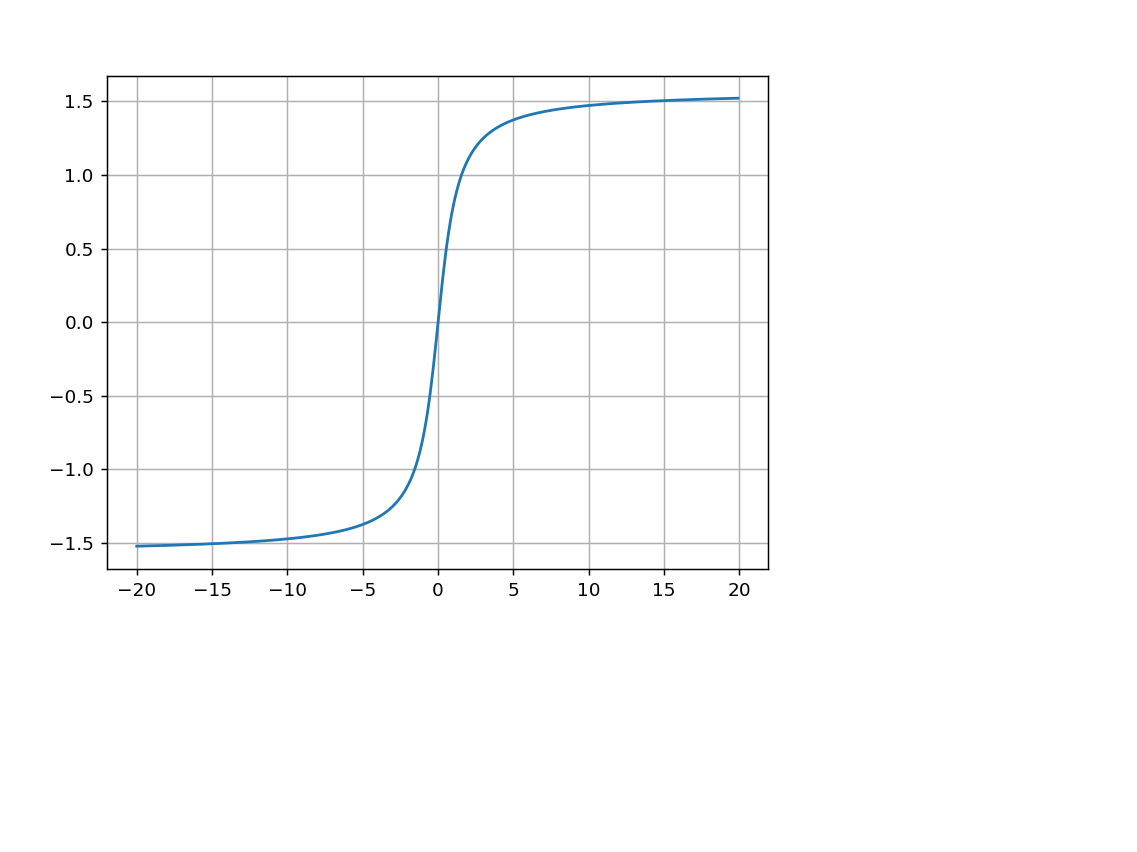

In [10]:
%matplotlib notebook

def g(x):
    return 1 / (1 + x*x)

g = primitive(g)

X = np.arange(-20, 20, 0.1)

plt.plot(X, [g(x) for x in X])
plt.grid()
plt.show()


## Un premier décorateur

Un décorateur est un élément de syntaxe pour remplacer les instructions du type: 

In [11]:
f = primitive(f) # f = une_fonction(f)

Cette syntaxe peut être remplacée par:

<IPython.core.display.Javascript object>


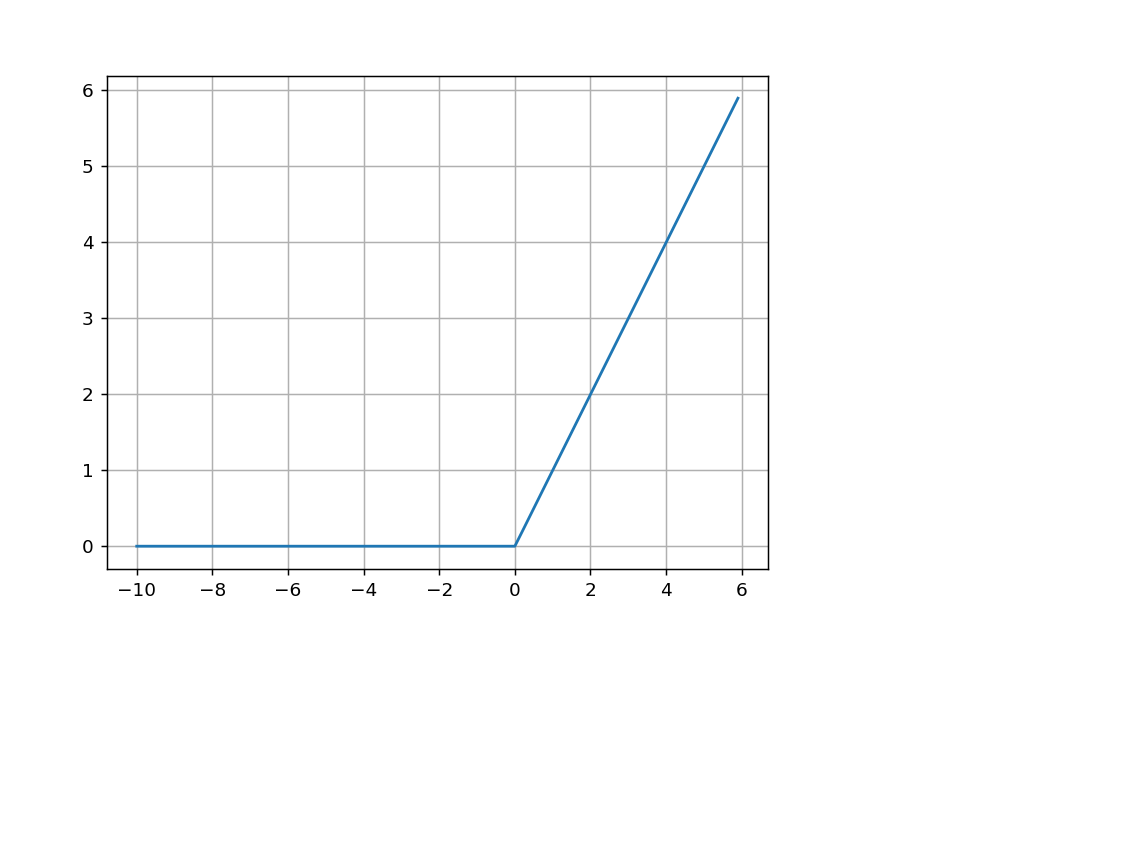

In [4]:
%matplotlib notebook

@primitive
def f(x):
    return 1 if x > 0 else 0

"""
La syntaxe ci-dessus est équivalente à:
def f(x):
    return 1 if x > 0 else 0
f = primitive(f)
"""

X = np.arange(-10,6,0.1)
plt.plot(X, [f(x) for x in X])
plt.grid()
plt.show()

## Un autre exemple
On souhaite transformer une fonction donnée en une nouvelle fonction qui fait la même chose mais en plus, affiche la liste des paramètres avec lesquelles elle a été appelée.

In [5]:
def montrer_param(f):
    def g(*args, **kwargs):
        print(f'La fonction {f.__name__} a été appelée avec la liste de paramètes:', args)
        return f(*args, **kwargs)
    return g

In [6]:
@montrer_param
def f(*args):
    return sum(args)

f(17,32,15)

La fonction f a été appelée avec la liste de paramètes: (17, 32, 15)


64

## Encore un exemple, curryfication
La **curryfication** pour une fonction a deux variables consiste a en prendre l'image par la fonction:
$$
\begin{array}{rcl}
C^{A\times B} & \rightarrow & C^{B^{A}}\\
f: & \mapsto & x \mapsto f_{x}
\end{array}
$$
où $f_{x}:y\mapsto f(x,y)$ est la fonction partielle.

In [1]:
def curryfier_2_variables(f):
    def g(x):
        def h(y):
            return f(x, y)
        return h
    return g

In [2]:
@curryfier_2_variables
def f(x, y):
    return x + y
print(f(4)(5))
g = f(3)
g(7)

9


10

Il se pourrait, une fois n'est pas coutume, que les choses soient plus claires avec une fonction anonyme:

In [5]:
def curryfier_2_variables(f):
    def g(x):
        return lambda y: f(x,y) # fonction partielle
    return g

In [4]:
@curryfier_2_variables
def f(x,y):
    return x * y

f(2)(4)

8

### Exercice
Comment faire pour étendre la notion à plusieurs variables?

## Encore un exemple , prermutation circulaire des paramètres

In [12]:
def permuter(f):
    def g(*args):
        premier, *suite = args
        return f(*suite, premier)
    return g

Observer ici l'usage de l'opérateur étoile.

In [13]:
@permuter
def f(x, y):
    return x**y

f(2, 3)

9

Il est possible d'"enchainer" plusieurs décorateurs: 

In [14]:
@permuter
@permuter
def g(x, y, z):
    return x, y, z

g(10, 20, 30)

(30, 10, 20)

## Décorateur et fonction récursive

In [17]:
def decorer(f):
    def g(*args):
        print("Appel de " + f.__name__ + "avec", *args)
        return f(*args)
    return g

Décorons une implémentation récursive de la factorielle:

In [18]:
@decorer
def factorielle(n):
    if n == 0:
        return 1
    return n * factorielle(n-1)

factorielle(5)

Appel de factorielleavec 5
Appel de factorielleavec 4
Appel de factorielleavec 3
Appel de factorielleavec 2
Appel de factorielleavec 1
Appel de factorielleavec 0


120

## Un cran de plus, décorateur à paramètre
Dans l'exemple où on cherche une primitive d'une fonction donnée, on aimerait pouvoir choisir la valeur qui annule ladite primitive.

In [19]:
def primitive(x0):
    def primitive_1(f):
        h = 0.001 # pas dans la méthode des rectangles
        def F(x):
            H = h if x > x0 else -h # attention aux bornes
            N = int((x-x0)/H) # nombre de points de la subdivision de [x0;x]
            return H * sum([f(x0 + i * H) for i in range(N)])
        return F
    return primitive_1

Ici, la fonction **primitive** retourne une fonction qui retourne une fonction qui retourne une fonction.

<IPython.core.display.Javascript object>


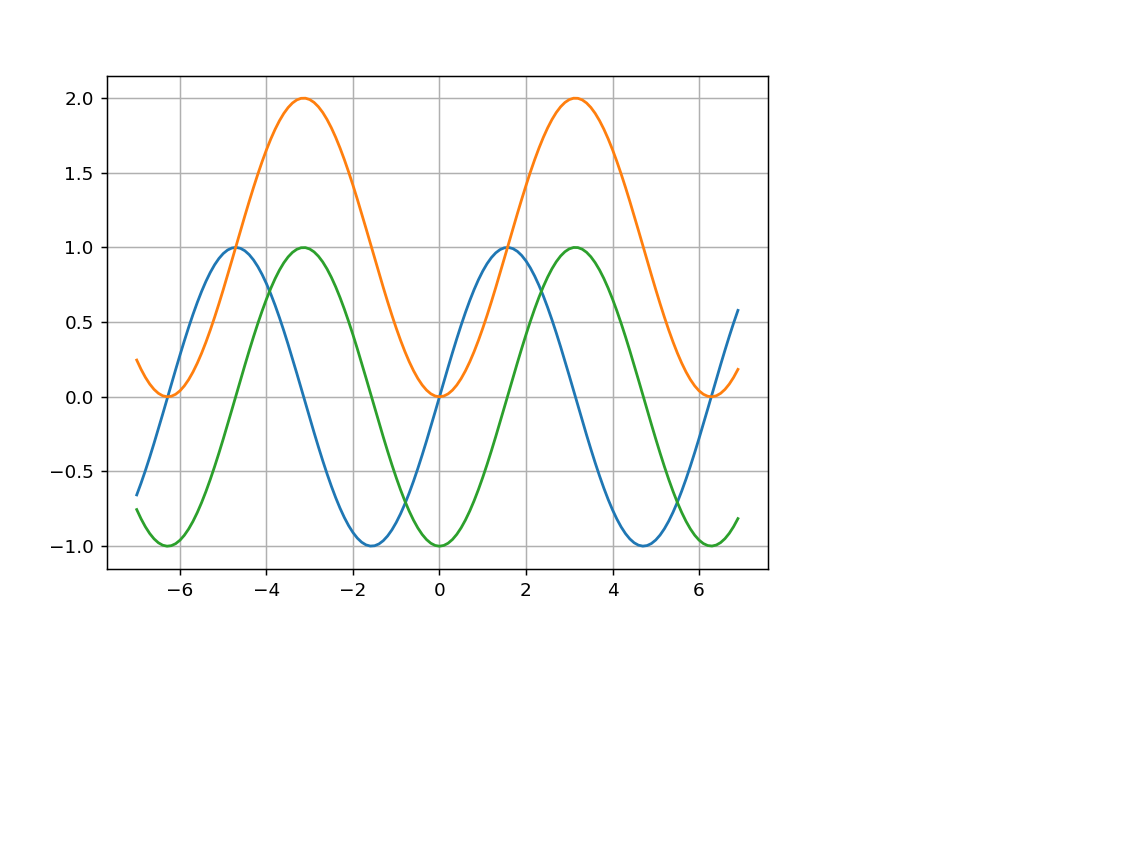

In [20]:
%matplotlib notebook

@primitive(0)
def f(x):
    return math.sin(x)

@primitive(math.pi / 2)
def g(x):
    return math.sin(x)

X = np.arange(-7,7,0.1)

plt.plot(X, [math.sin(x) for x in X])
plt.plot(X, [f(x) for x in X])
plt.plot(X, [g(x) for x in X])
plt.grid()

plt.show()

## Décorateurs marginaux

In [10]:
def decorateur_constant(f):
    return 0

In [13]:
@decorateur_constant
def f(x):
    return x

f

0

## Ouverture

In [21]:
def curryfier_3_variables(f):
    return lambda x: lambda y: lambda z: f(x, y, z)

In [23]:
@curryfier_3_variables
def f(x, y,z):
    return x + y + z

print(f(2))
print(f(2)(10))
print(f(2)(10)(20))

<function curryfier_3_variables.<locals>.<lambda>.<locals>.<lambda> at 0x7fcb924537b8>
<function curryfier_3_variables.<locals>.<lambda>.<locals>.<lambda>.<locals>.<lambda> at 0x7fcb924539d8>
32


Il y a un motif récursif dans **curryfier_3_variables**. Ce motif est-il implémentable?